# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image 데이터들을 Network(모델)에 배치단위로 제공한다.
    - 다양한 Image Augmentation(이미지증식) 기능을 제공한다. 
        - Data제공 파이프라인에 Image Augmentation을 쉽게 적용할 수 있다.
- 전체 데이터를 한번 다 제공하더라도 계속 요청하면 반복해서 제공한다.
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

## ImageDataGenerator()
- tensorflow.keras.preprocessing.image.ImageDataGenerator
    - Image 제공 데이터파이프라인을 어떻게 만들지 설정한다.
    
- **매개변수**: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        - constant: 지정한 값으로 채움. 기본은 0이고 특정값으로 채울때는 cval=100 으로 설정
    - **Nomalization 설정**
        - **rescale**: 지정한 값을 각 픽셀에 곱한다. (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균 0으로 표준화한다. (channl 별로 처리)
        - **featurewise_std_nomalization=True**: channel 별로 표준화한다. (평균 0, 표준편차 1)
    - **반전**
         - **horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - **회전(rotation)**
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 랜덤 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - **이동**
         - **width_shift_range=실수**: 좌우이동, **height_shift_range=실수**: 상하 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel. 
         - 정수: [-정수, 0, +정수]  범위
         
    - **Zoom**
         - **zoom_range**: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 리스트: 원하는 비율류 lower, upper 지정할때. 설정한 값이 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - **shear(전단변환)**: 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - **명암 (brightness)**
        - **brightness_range** : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보타 크면 밝아진다. 
          
- **flow 메소드들**
    - ImageDataGenerator에 Image Data를  연결하여 batch 단위로 공급하는 Iterator 생성해준다.
    - Raw Image data의 위치에 따라 다양한 메소드를 제공한다.

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### flow_from_directory () 
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
        - 클래스별로 따로따로 묶어준다.
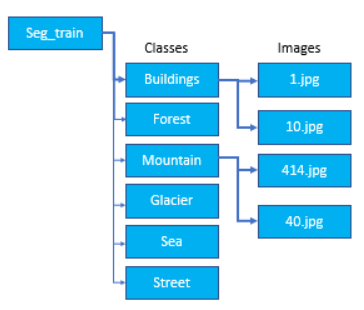
    
    - **Directory 이름을 class name으로 한다.**
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. 
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

## 흐름
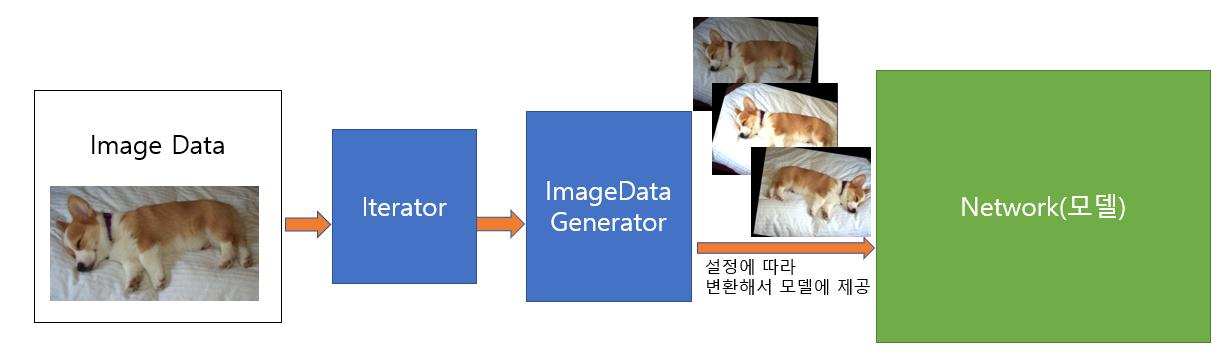

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 경로를 주면 이미지를 loading
from tensorflow.keras.preprocessing.image import load_img # test_img에서 image.jpg를 읽어오려고 사용
from tensorflow.keras.preprocessing.image import img_to_array # Pillow의 Image객체를 ndarray로 변환
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 파이프라인 구성.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


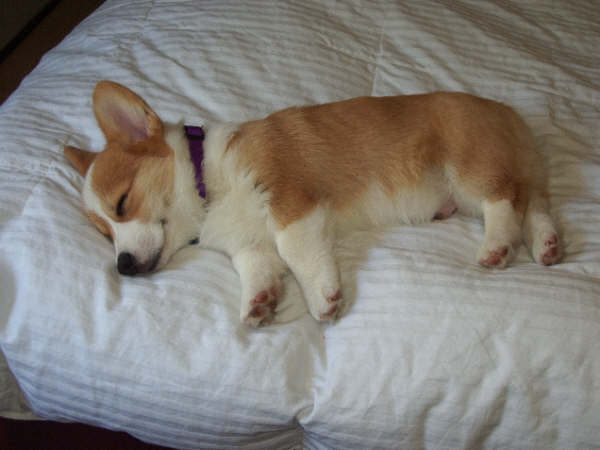

In [5]:
# Image 로딩.
img = load_img('test_img/image.jpg') # target_size=(w,h) 리사이즈. -> 생략하면 원본사이즈로.
print(type(img))
img

In [6]:
# PILLOW 이미지 객체를 ndarray로 변환
data = img_to_array(img)
print(type(data), data.shape)

<class 'numpy.ndarray'> (450, 600, 3)


In [7]:
# batch 축 추가 (데이터의 개수를 추가해주는 것)
sample = data[np.newaxis, ...]
sample.shape

# sample: 데이터셋.원본데이터셋 ====> ndarray로 메모리에 이미 loading된 상태.
                                # ==>flow()메소드를 이용해서 파이프라인에 연결할 것이다.

(1, 450, 600, 3)

<class 'keras.src.preprocessing.image.ImageDataGenerator'>


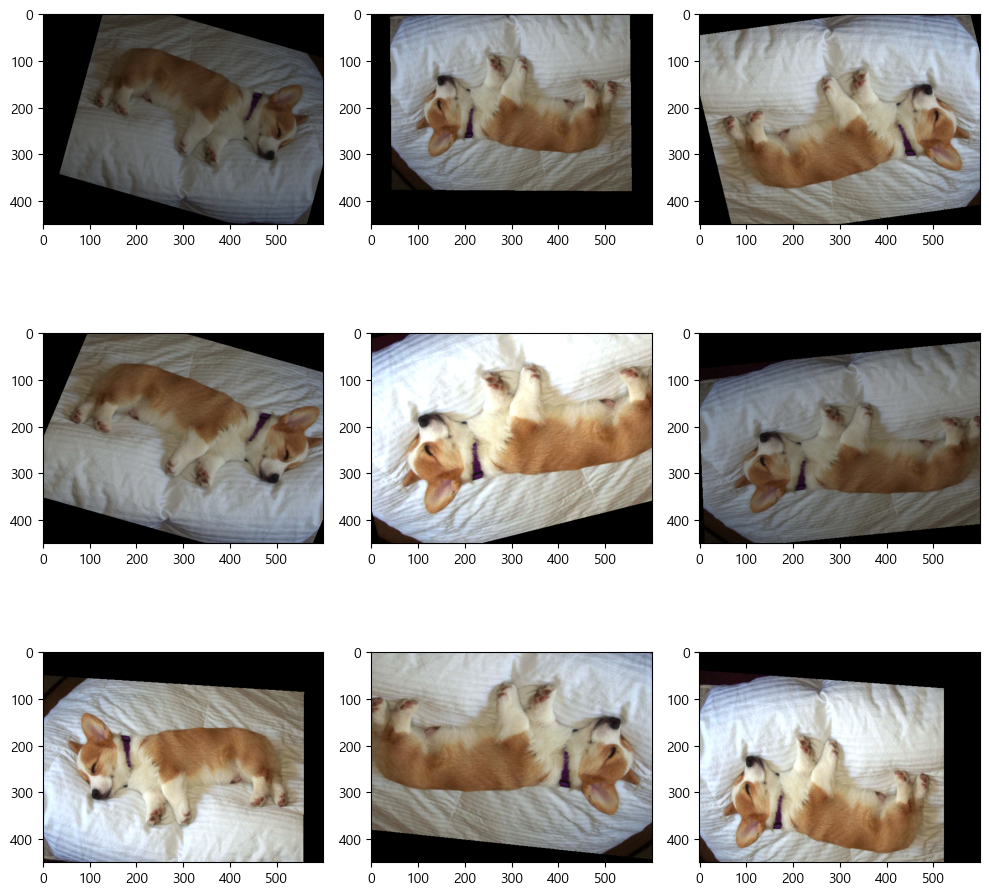

In [17]:
# Generator 생성
datagen = ImageDataGenerator() #  어떤 처리도 없는 (빈)파이프라인을 생성한것.
print(type(datagen))
 # 각 pixcel에 rescale의 값(1./255)을 곱한다.
# datagen = ImageDataGenerator(rescale=1./255) 

#좌우이동. 0~1사이 실수: width기준 비율.(좌:50% ~ 우:50%)
# datagen = ImageDataGenerator(width_shift_range=0.5, fill_mode='constant')

# 상하이동. 정수: -200 ~ 200 사이.
# datagen = ImageDataGenerator(height_shift_range=200) # fil

# 전단(shear)변환 => 평행사변형.
# datagen = ImageDataGenerator(shear_range=50, fill_mode='constant')

# 회전 (-40 ~ 40)
# datagen = ImageDataGenerator(rotation_range=40, fill_mode='reflect')  

# zooming (1: 원본), 1보다 크면 zoom in, 1보다 작으면 zoom out
# datagen = ImageDataGenerator(zoom_range=2, fill_mode='constant')

# 밝기 (1: 원본) 0.3 ~ 1.3
# datagen = ImageDataGenerator(brightness_range=(0.3,1.3)) 

# 좌우 반전
# datagen = ImageDataGenerator(horizontal_flip=True)

# 상하 반전
# datagen = ImageDataGenerator(vertical_flip=True)

datagen = ImageDataGenerator(
#                 rescale=1./255,
                rotation_range=20, # -20~20회전
                width_shift_range=0.1, # 상하로 height의 -10% ~ + 10%기준으로 이동
                height_shift_range=0.1,# 좌우로 width의 -10%~+10%기준으로 이동
                zoom_range=0.2, # 줌 인/아웃 [0.8,1.2]
                brightness_range=(0.5,1.5), # 밝기 조정 = [0.5 ~1.5]
                horizontal_flip=True,# 좌우 반전
                vertical_flip=True, # 상하 반전
                shear_range=5, # 전단 변환 (평행사변형 형태로 이동)
                fill_mode = 'constant' # 이동 관련 변환 후 빈 공간을 0으로 채운다.
)


fig = plt.figure(figsize=(10,10))
iterator = datagen.flow(sample, batch_size=1) # 한번 값달라고할때 한장씩 줘!

# print(type(iterator))

for i in range(9): # 9장 확인
    plt.subplot(3,3,i+1)
    batch = next(iterator) # float32
    img = batch[0].astype('uint8') 
    plt.imshow(img)
    
plt.tight_layout()
plt.show()    